## Generating random numbers with Gaussian/binomial/Poisson distributions

Import libraries:

In [1]:
import numpy as np # import numpy library as np
import math # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot') # use "ggplot" style for graphs
% matplotlib inline

### Normal Distribution

The exact form is given as:

$$P(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\langle X \rangle)^2}{2\sigma^2}\right]\tag{1}$$

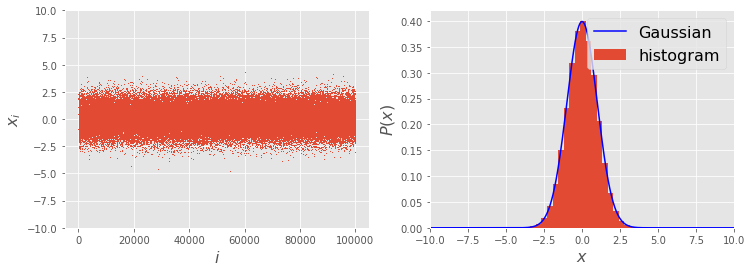

In [27]:
# Simulate
ave = 0.0
std = 1.0
N = 100000
np.random.seed(0)
X = ave + std * np.random.randn(N)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.set_ylim(-10,10) # set y-range
ax1.set_xlabel(r'$i$',fontsize=16) # set x-label
ax1.set_ylabel(r'$x_i$',fontsize=16) # set y-label
ax1.plot(X,',') # plot x_i vs. i (i=1,2,...,N) with dots

# Histogram
ax2.hist(X, bins = 25, normed = True)

#Exact
x = np.arange(-10, 10, 0.01)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

ax2.set_xlim(-10,10) # set x-range
ax2.plot(x,y,color='b') # plot y vs. x with blue line
ax2.set_xlabel(r'$x$',fontsize=16) # set x-label
ax2.set_ylabel(r'$P(x)$',fontsize=16) # set y-label
ax2.legend([r'Gaussian',r'histogram'], fontsize=16) # set legends

plt.show() # display plots

We have use histogram as method for approximation of PDF. The accuracy can be improved by drawing more samples N, reducing bin size or for example adaptive binning. The histogram approach is viable only in low dimensions (up to 2).

#### Autocorrelation function

Here we define autocorrelation function without normalization factor:
$$\varphi(i) = \frac{1}{N} \sum_{j=1}^{N} \left(x_j - \langle X\rangle\right) \left(x_{i+j}-\langle X\rangle\right) \tag{2}$$

The normalization factor is then:
$$\varphi(i=0) = \frac{1}{N} \sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)^2 = \sigma^{2} \tag{2}$$

From good random number generator we expect that the random numbers are i.i.d:

$$ \varphi(i\ne 0)= \langle x_j - \langle X\rangle\rangle\langle x_{i\ne j} - \langle X\rangle\rangle=0\hspace{5mm} (\rightarrow{\rm White\ noise})\hspace{-12mm} \tag{4} $$


\sigma^2  = 1.0


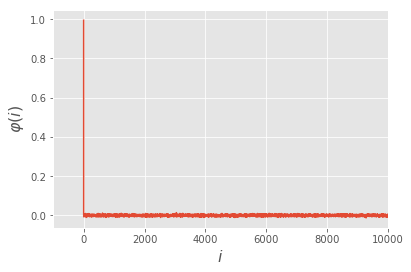

In [28]:
def auto_correlate(x, do_scale = False):
    cor = np.correlate(x, x, mode = "full")/N
    if do_scale:
        cor = cor / np.var(x)
    return cor[N-1:]

c = np.zeros(N)
c = auto_correlate(X-ave)

plt.plot(c)
plt.xlim(-1000,10000)
plt.xlabel(r'$i$',fontsize=16)
plt.ylabel(r'$\varphi(i)$',fontsize=16)
print(r'\sigma^2  =',std**2)
plt.show()

### Bionomial distribution
The exact form is given:
$$ P(n) = \frac{M!}{n!(M-n)!}p^{n}(1-p)^{M-n}\tag{5}$$

with moments: $\langle n \rangle = Mp$ and $\sigma^2=Mp(1-p).$

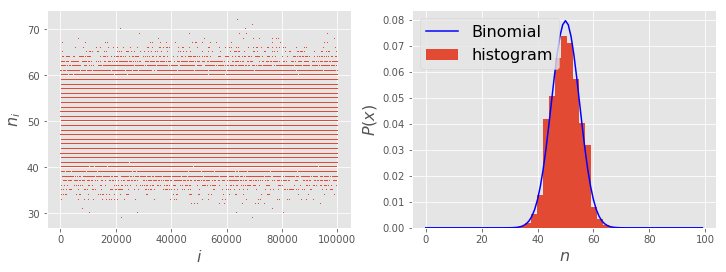

In [29]:
p = 0.5
M = 100
N = 100000
np.random.seed(0)
X = np.random.binomial(M,p,N)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.set_xlabel(r'$i$',fontsize=16) # set x-label
ax1.set_ylabel(r'$n_i$',fontsize=16) # set y-label
ax1.plot(X,',') # plot x_i vs. i (i=1,2,...,N) with dots

# Histogram
ax2.hist(X, bins = 20, normed = True)

#Exact
x = np.arange(M)
y = np.zeros(M)
def binomial_exact(m,p, n):
    comb = math.factorial(m)/(math.factorial(n)*math.factorial(m-n))
    prob = comb * p**n * (1-p)**(m-n)
    return prob
for i in range(M):
    y[i] = binomial_exact(M, p, i)

ax2.plot(x,y,color='b') # plot y vs. x with blue line
ax2.set_xlabel(r'$n$',fontsize=16) # set x-label
ax2.set_ylabel(r'$P(n)$',fontsize=16) # set y-label
ax2.legend([r'Binomial',r'histogram'], fontsize=16) # set legends

plt.show() # display plots

Note that this is discrete distribution. The autocorrelation function is defined similarly as in previous case:

\sigma^2  = 25.0


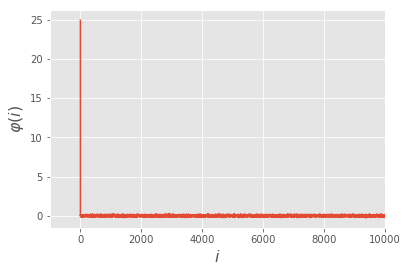

In [31]:
c = np.zeros(N)
c = auto_correlate(X-M*p, False)

plt.plot(c)
plt.xlim(-1000,10000)
plt.xlabel(r'$i$',fontsize=16)
plt.ylabel(r'$\varphi(i)$',fontsize=16)
print(r'\sigma^2  =',M*p*(1-p))
plt.show()

### Poisson Distribution

The exact form is:
$$P(n)=\frac{a^n e^{-a}}{n!}\tag{6}$$

with moments: $\langle n \rangle = a$ and $\sigma^2 = a$.


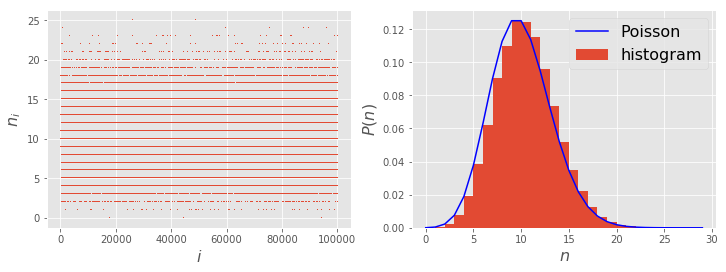

In [68]:
a = 10
N = 100000
M = 3*a
np.random.seed(0)
X = np.random.poisson(a,N)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.set_xlabel(r'$i$',fontsize=16) # set x-label
ax1.set_ylabel(r'$n_i$',fontsize=16) # set y-label
ax1.plot(X,',') # plot x_i vs. i (i=1,2,...,N) with dots

# Histogram
ax2.hist(X, bins = 25, normed = True)

#Exact
x = np.arange(M)
y = np.zeros(M)
def poisson_exact(a, n):
    prob = a**n*np.exp(-a) / math.factorial(n)
    return prob
for i in range(M):
    y[i] = poisson_exact(a, i)

ax2.plot(x,y,color='b') # plot y vs. x with blue line
ax2.set_xlabel(r'$n$',fontsize=16) # set x-label
ax2.set_ylabel(r'$P(n)$',fontsize=16) # set y-label
ax2.legend([r'Poisson',r'histogram'], fontsize=16) # set legends

plt.show() # display plots

* Can consider adaptive binning for more robustnes.
* Note that we tend to under/over estimate the exact PDF at given parts of the interval.

# Distribution function and central limit theorem

Sum of i.i.d RVs is normally distributed with:
$$ \mu^{M\gg1}_1=M \mu^{M=1}_1, \hspace{20mm} \sigma_{M\gg1}^2=\frac{\sigma_{M=1}^2}{M} $$

### Numerical Experiment on Binomial pdf

In [69]:
import numpy as np # import numpy library as np
import math # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt
% matplotlib inline
plt.style.use('ggplot') # use "ggplot" style for graphs

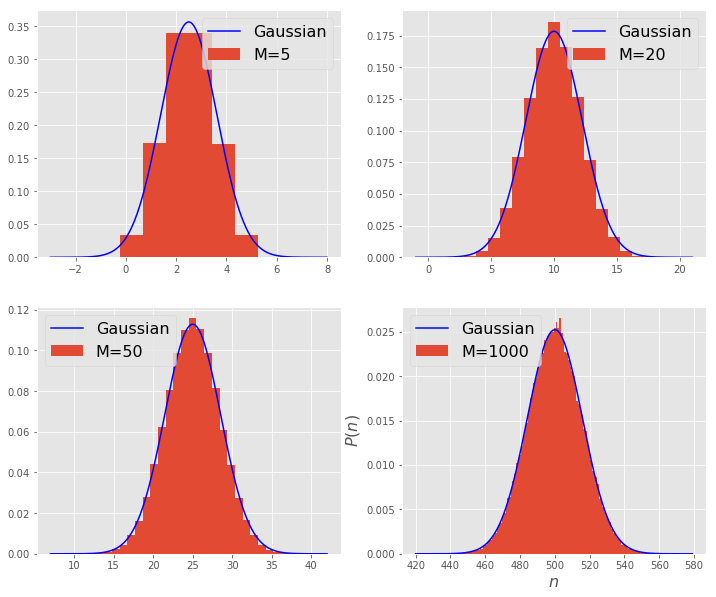

In [103]:
p = 0.5
N = 100000

fig, axes = plt.subplots(2,2, figsize = (12, 10))
Ms = [5, 20, 50, 1000]
for i, ax in enumerate(axes.flatten()):
    ave = Ms[i]*p
    std = np.sqrt(Ms[i]*p*(1-p))
    np.random.seed(0)
    nmin=np.int(ave-std*5)
    nmax=np.int(ave+std*5)
    nbin=nmax-nmin+1
    X = np.random.binomial(Ms[i], p, N)
    ax.hist(X,range=[nmin,nmax],bins=nbin,normed=True, label = "M={}".format(Ms[i]))
    x = np.arange(nmin, nmax, 0.01/std)
    y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
    ax.plot(x,y,color='b', label = "Gaussian") # plot y vs. x with blue line
    ax.set_xlabel(r'$n$',fontsize=16) # set x-label
    ax.set_ylabel(r'$P(n)$',fontsize=16) # set y-label
    ax.legend(fontsize = 16) # set legends

plt.show() # display plots

We observe that the sum of i.i.d. binomial RVs indeed approaches Normal distribution and that the agreement looks good already at 50 samples. 

### Numerical Experiment on Unifromly distributed RVs

For sum of $M$ uniformly distributed RVs it holds:
$$ \mu^{M\gg1}_1=M\mu^{M=1}_1=\frac{M}{2},\hspace{20mm} \sigma_{M\gg1}^2=M\sigma_{M=1}^2=\frac{M}{12} $$

nmin =0; nmax = 4; nbin = 4
nmin =3; nmax = 16; nbin = 20
nmin =14; nmax = 35; nbin = 50
nmin =35; nmax = 64; nbin = 100


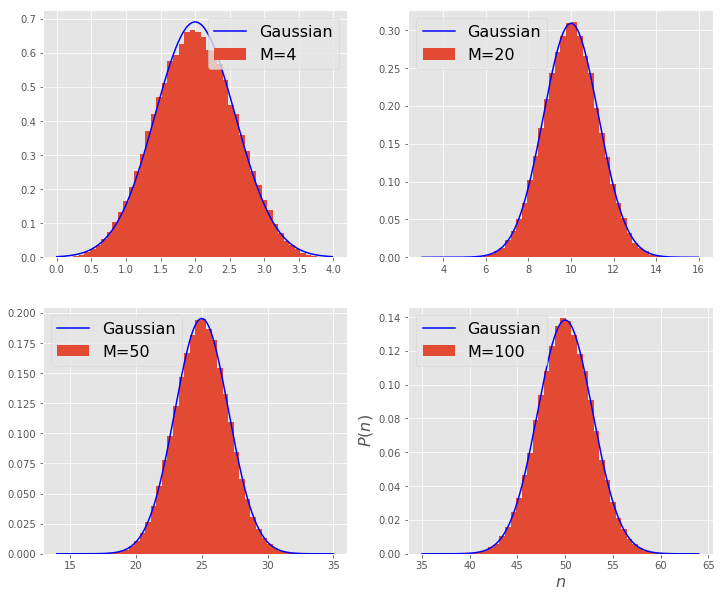

In [104]:
N = 100000
fig, axes = plt.subplots(2,2, figsize = (12, 10))
Ms = [4, 20, 50, 100]

for i, ax in enumerate(axes.flatten()):
    ave = Ms[i]/2
    std = np.sqrt(Ms[i]/12)
    np.random.seed(0)
    nmin = np.int(ave-std*5)
    nmax=np.int(ave+std*5)
    nbin=Ms[i]
    print("nmin ={}; nmax = {}; nbin = {}".format(nmin,nmax,nbin))
    
    X = np.zeros(N)
    for j in range(N): # Do N experiments
        X[j] += np.sum(np.random.rand(Ms[i])) 
    
    ax.hist(X,range=[nmin,nmax],bins=50,normed=True, label = "M={}".format(Ms[i]))
    x = np.arange(nmin, nmax, 0.01/std)
    y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
    ax.plot(x,y,color='b', label = "Gaussian") # plot y vs. x with blue line
    ax.set_xlabel(r'$n$',fontsize=16) # set x-label
    ax.set_ylabel(r'$P(n)$',fontsize=16) # set y-label
    ax.legend(fontsize = 16) # set legends

plt.show() # display plots

### Naive Random Number Generator

Consider pseudo random number generator that, given a random seed $X_0$, generates sequence of numbers $\zeta_{i} \in [0, 1]$ as:
$$X_{i+1} = \textrm{mod}(a X_i + b, M)$$
$$\zeta_i = X_i / M$$,

where $a$, $b$, $M$ are some constants.

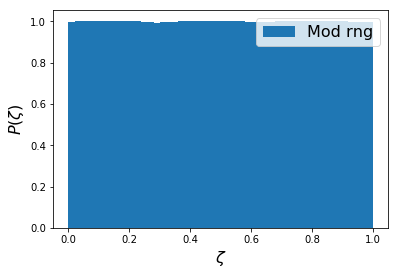

In [1]:
def rng_ex(seed, a, b, M, ntotal):
    data = np.zeros(np.int(ntotal))
    data[0] = seed
    for i in range(1,np.int(ntotal)):
        data[i] = np.mod((a*data[i-1]+b), M)
    return data/np.float(M)
N = np.int(1e5)
X = rng_ex(123456, 8121, 28411, 134456, 5e5)

fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.hist(X, bins = 50, normed=True, label = "Mod rng")
ax.set_xlabel(r'$\zeta$',fontsize=16) # set x-label
ax.set_ylabel(r'$P(\zeta)$',fontsize=16) # set y-label
ax.legend(fontsize = 16) # set legends
plt.show()

It indeed seems that numbers are generated with equal probability throughout the interval. Let's inspect the autocorrelation:

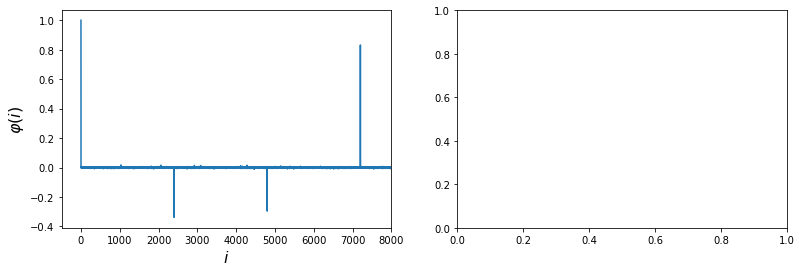

In [21]:
def auto_correlate(x, do_scale = False):
    cor = np.correlate(x, x, mode = "full")/len(x)
    if do_scale:
        cor = cor / np.var(x)
    return cor[N-1:]

N = np.int(1e5)
X = rng_ex(123456, 8121, 28411, 134456, N)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (13, 4))

c = np.zeros(N)
ave = np.average(X)
std = 1/12
c = auto_correlate(X - ave, True)

ax1.plot(c)
ax1.set_xlim(-500,8000)
ax1.set_xlabel(r'$i$',fontsize=16)
ax1.set_ylabel(r'$\varphi(i)$',fontsize=16)


plt.show()

We see that the generator output variables that are correlated for certain multiple of $i$.

### Tails of Normal Distribution
Using tabulated values or by integrating the pdf of standard normal distribution, we can find the percentage of RVs that lie within the $2\sigma$ interval. With $\sigma = 1$ this becomes

$$\Phi(2\sigma) = \frac{1}{\sqrt{2\pi}} \int_{-2\sigma}^{2\sigma} \exp \Big(\frac{-x^2}{2}\Big) dx = \frac{1}{2} \Big[\operatorname{erf}(\sqrt{2}\sigma) - \operatorname{erf}(-\sqrt{2}\sigma)\Big] = 0.9545$$